# Cluster Sampling

**K-Means Clustering**

In this session, we are going to see how we can perform clustering in practice. To achieve this, we are going to apply one of the most commonly used mothod called K-Means. 

K-means clustering is a very simply algorithm that clusters data into K numbers of clusters. But before we dive into what K-mean is all about, there are few terminologies we need to understand to fully grasp the power of K-means clustering.

Please watch the following short videos which explains a few terminologies we are going to use and an overview of how K-means work.


*   [K-mean prerequisites](https://drive.google.com/file/d/1JCrS3sRjnZK6GyNYHNwCS6FjyJYryyIQ/view?usp=sharing)
*   [K-mean clustering](https://drive.google.com/file/d/119mx9ftGnLZHpK2MuFu__pYKj8UEMKFW/view?usp=sharing)



#Examples

In [1]:
# Let's start by importing the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles of all graphs to Seaborn one
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

**Load the data**

Here is the dataset that we will be using for this example. [Dataset Download](https://drive.google.com/file/d/1IrGJhPCN0e70xlvK2UvLLsup4Fp9uEdH/view?usp=sharing)

In [3]:
# Load the country clusters data
data = pd.read_csv('3.01. Country clusters.csv')

#checking out the data manually
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


**Plotting the Data**

<function matplotlib.pyplot.show>

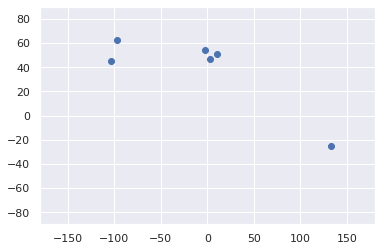

In [4]:
# Create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

**Selecting the features we want from our Dataset**

In [5]:
# Since we want to cluster our dataset depending on location, we are going to extract the longitude and latitude and use them as our input while clustering
# To achieve this we will use panda's method .iloc to slice the columns we want from the dataset.
# The first argument of this method identifies the rows we want to keep
# The second - the columns
# In our case, we want to keep all rows and the 1 and 2 colummn.
# Note: Python column indices start from 0

x = data.iloc[:, 1:3]

# Check if we got the 1 and 2 column
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


**Clustering**

In [6]:
# Create an object from the KMeans method we imported from sklearn library
# The argument in the Kmean method indicates the number of clusters we are aiming for. 
# We will use this object for clustering
kmeans = KMeans(2)

# Clustering itself happens using the fit method like this.Here, we are calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

KMeans(n_clusters=2)

**Clustering Results**

In [7]:
# Now that we have performed clustering, we need to obtain the predicted clusters for each observation by using the fit_predict method from sklearn.

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

# The result is an array containing the predicted clusters. There are 2 clusters indicated by 0 and 1.

array([0, 0, 0, 0, 0, 1], dtype=int32)

In [8]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


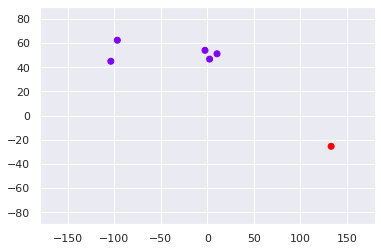

In [9]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

#Challenges


**Challenge 1**

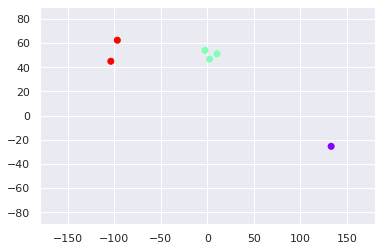

In [11]:
#Increase the number of clusterds in the above example to see the difference in the scatter plot
# Create an object from the KMeans method we imported from sklearn library
# The argument in the Kmean method indicates the number of clusters we are aiming for. 
# We will use this object for clustering
kmeans = KMeans(3)

# Clustering itself happens using the fit method like this.Here, we are calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

# Now that we have performed clustering, we need to obtain the predicted clusters for each observation by using the fit_predict method from sklearn.

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

# The result is an array containing the predicted clusters. There are 2 clusters indicated by 0, 1 and 2.

# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

**Challenge 2**

You are given the following dataset ([Dataset Download](https://drive.google.com/file/d/1y6I2BZnYvFIcgyHpuNHnUAL2v2FIEgwr/view?usp=sharing)) and you are required to group all the countries into 2 clusters.

Try with other numbers of clusters and see if they match your expectations.

Plot the data using the c parameter to separate the data by the clusters we defined.

Note: c stands for color 

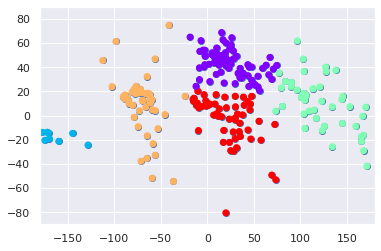

In [19]:
# Your code goes here
# Load the country clusters data
df = pd.read_csv('Countries-exercise.csv')

#checking out the data manually
df

# Create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(df['Longitude'],df['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

# Since we want to cluster our dataset depending on location, we are going to extract the longitude and latitude and use them as our input while clustering
# To achieve this we will use panda's method .iloc to slice the columns we want from the dataset.
# The first argument of this method identifies the rows we want to keep
# The second - the columns
# In our case, we want to keep all rows and the 1 and 2 colummn.
# Note: Python column indices start from 0

x = data.iloc[:, 1:3]

# Check if we got the 1 and 2 column
x

# Create an object from the KMeans method we imported from sklearn library
# The argument in the Kmean method indicates the number of clusters we are aiming for. 
# We will use this object for clustering
kmeans = KMeans(5)

# Clustering itself happens using the fit method like this.Here, we are calling the fit method on the object we created and then using our input as x.
kmeans.fit(x)

# Now that we have performed clustering, we need to obtain the predicted clusters for each observation by using the fit_predict method from sklearn.

# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

# The result is an array containing the predicted clusters. There are 2 clusters indicated by 0 and 1.

# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()